In [1]:
!git clone https://github.com/hlmhlr/yolov5/ 

Cloning into 'yolov5'...
remote: Enumerating objects: 19934, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 19934 (delta 65), reused 108 (delta 51), pack-reused 19769
Receiving objects: 100% (19934/19934), 15.74 MiB | 16.35 MiB/s, done.
Resolving deltas: 100% (13357/13357), done.


In [2]:
cd yolov5

/content/yolov5


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
!git checkout yolo_det_vis

Branch 'add_gradcam' set up to track remote branch 'add_gradcam' from 'origin'.
Switched to a new branch 'add_gradcam'


In [5]:
!git pull

Already up to date.


In [6]:
!pip install -qqr requirements.txt
!pip install grad-cam==1.4.6 -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [7]:
!wget https://raw.githubusercontent.com/pooya-mohammadi/yolov5-gradcam/master/images/cat-dog.jpg 

--2023-04-19 15:13:37--  https://raw.githubusercontent.com/pooya-mohammadi/yolov5-gradcam/master/images/cat-dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90226 (88K) [image/jpeg]
Saving to: ‘cat-dog.jpg’

cat-dog.jpg         100%[===================>]  88.11K  --.-KB/s    in 0.02s   

2023-04-19 15:13:37 (4.19 MB/s) - ‘cat-dog.jpg’ saved [90226/90226]



/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-19 Python-3.9.16 torch-2.0.0+cu118 CPU



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


100%|██████████| 14.1M/14.1M [00:00<00:00, 121MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


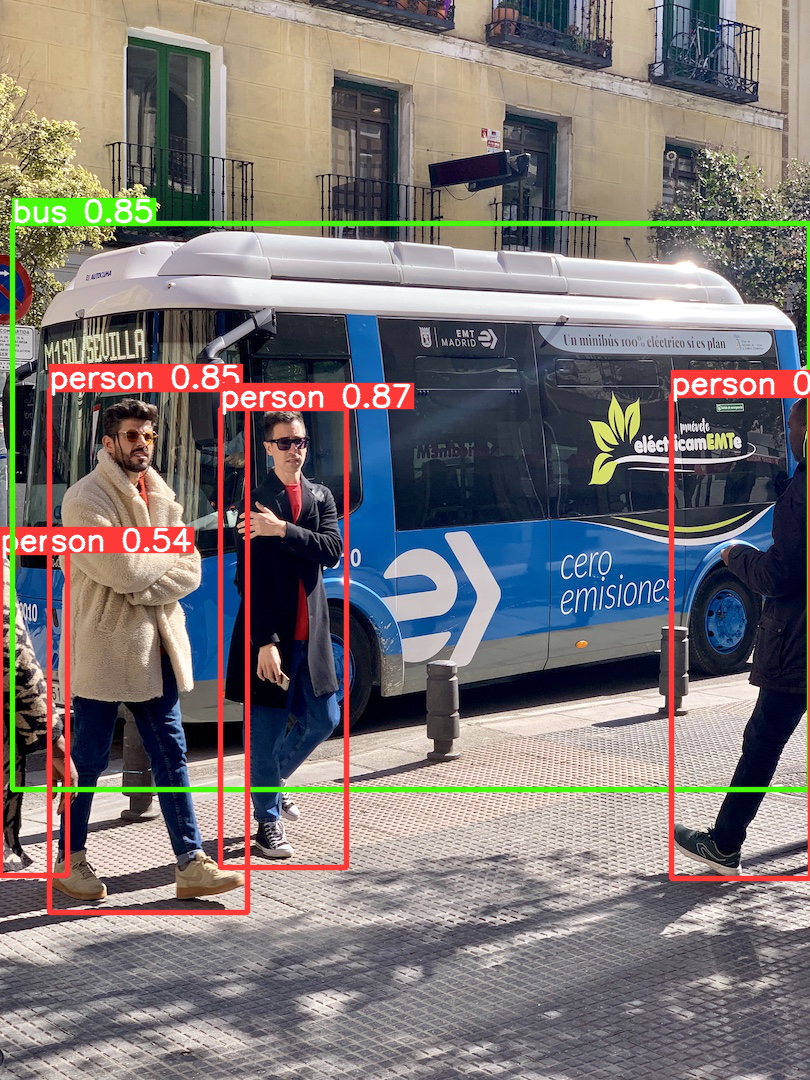

In [8]:
import torch
model = torch.hub.load("ultralytics/yolov5", "yolov5s") 
img = 'data/images/bus.jpg'
results = model(img)
results.show()

YOLOv5 🚀 2023-4-19 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


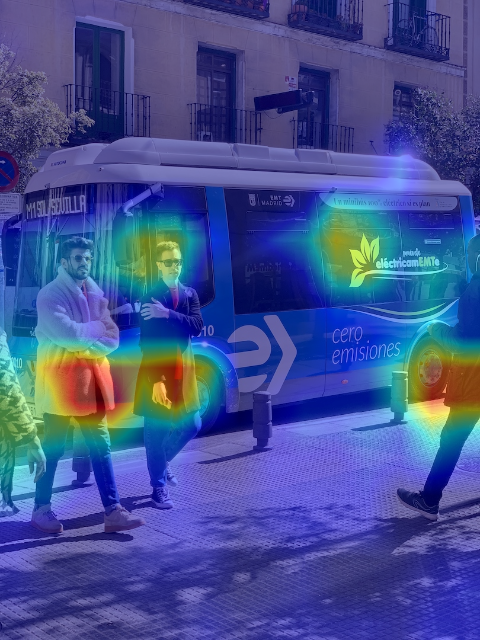

In [10]:
from explainer.explainer import run

image, image_boxes, combine_image =run(source='data/images/bus.jpg',method='gradcam',layer=-2,class_names=['person'])
import PIL
PIL.Image.fromarray(image)

YOLOv5 🚀 2023-4-19 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


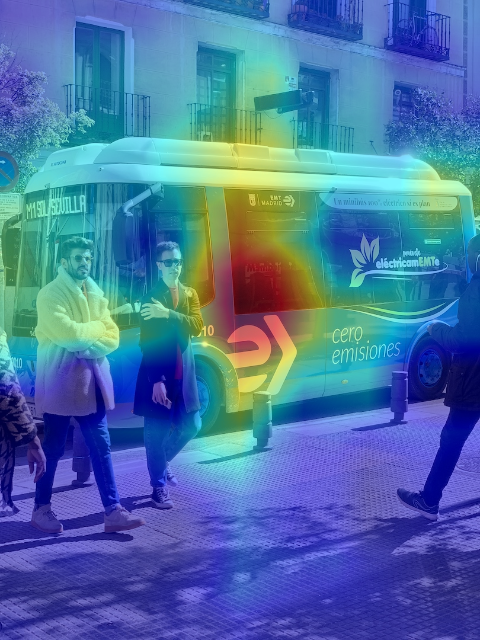

In [14]:
from explainer.explainer import run

image=run(source='data/images/bus.jpg',method='gradcamplusplus',layer=-2,class_names=['bus'])
import PIL
PIL.Image.fromarray(image)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-19 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 


requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


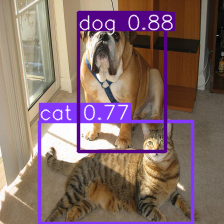

In [15]:
import torch
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
img = 'cat-dog.jpg'
results = model(img)
results.show()

YOLOv5 🚀 2023-4-19 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


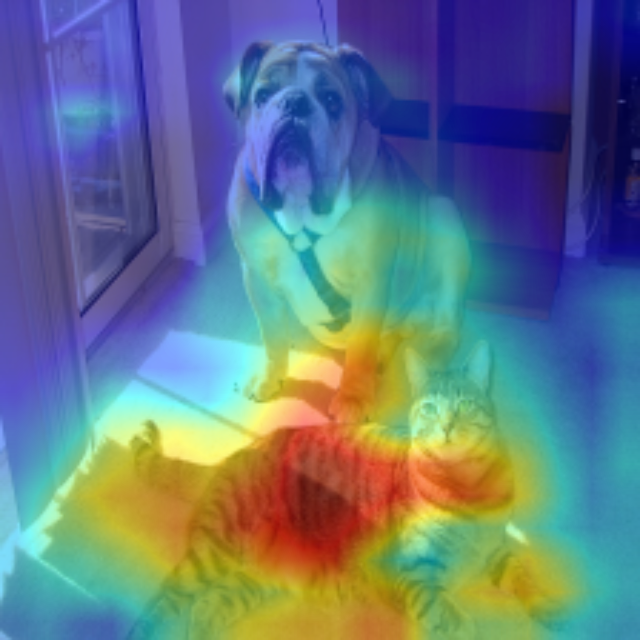

In [16]:
from explainer.explainer import run

image=run(source='cat-dog.jpg',method='gradcam',layer=-2,class_names=['cat','dog'],backward_per_class=False)
import PIL
PIL.Image.fromarray(image)

YOLOv5 🚀 2023-4-19 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


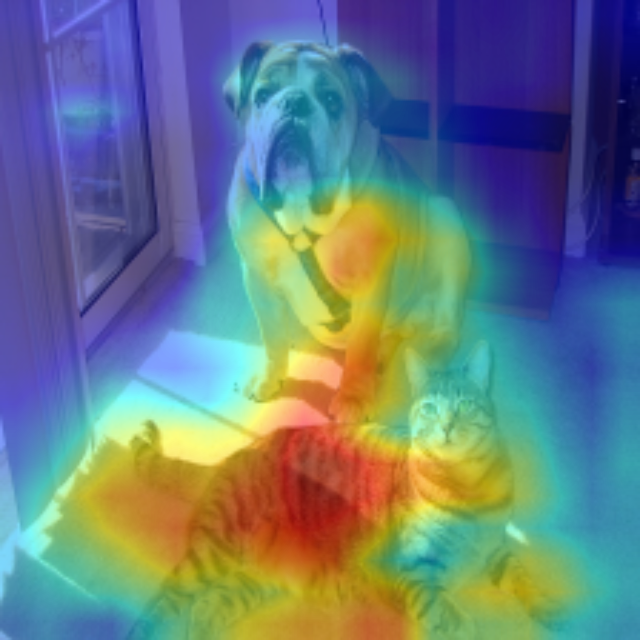

In [17]:
from explainer.explainer import run

image=run(source='cat-dog.jpg',method='gradcam',layer=-2,class_names=['cat','dog'],backprop_array=['class'],backward_per_class=True)
import PIL
PIL.Image.fromarray(image)

YOLOv5 🚀 2023-4-19 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


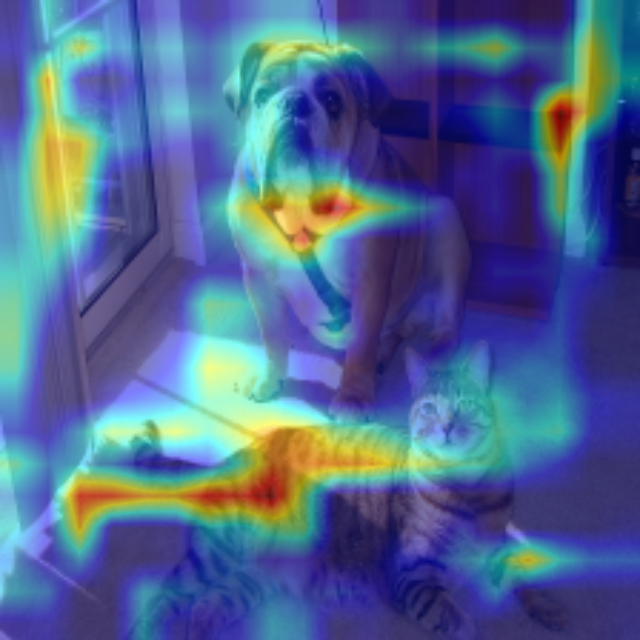

In [18]:
from explainer.explainer import run

image=run(source='cat-dog.jpg',method='gradcam',layer=-2,class_names=['cat','dog'],backprop_array=['x_c','y_c'])
import PIL
PIL.Image.fromarray(image)

YOLOv5 🚀 2023-4-19 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


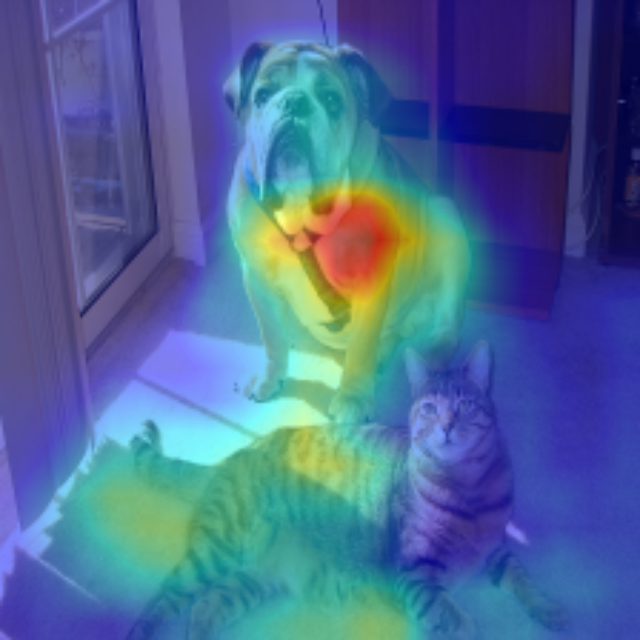

In [19]:
from explainer.explainer import run

image=run(source='cat-dog.jpg',method='gradcam',layer=-2,class_names=['dog'],backprop_array=['class'])
import PIL
PIL.Image.fromarray(image)

YOLOv5 🚀 2023-4-19 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


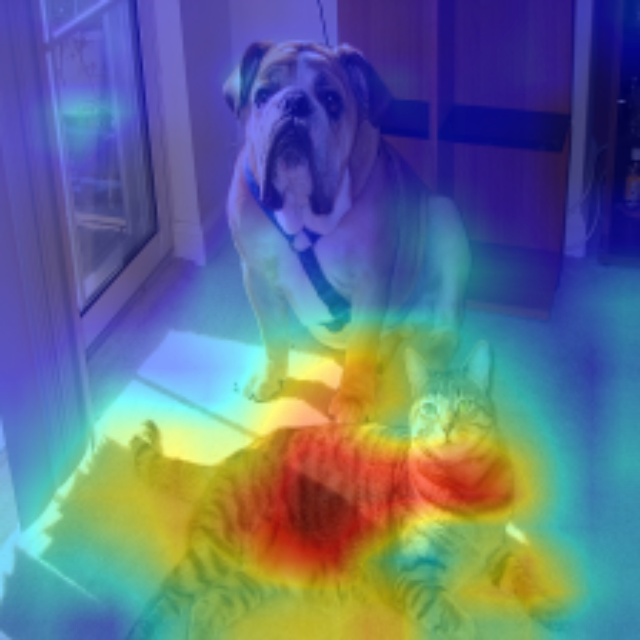

In [20]:
from explainer.explainer import run

image=run(source='cat-dog.jpg',method='gradcam',layer=-2,class_names=['cat'],backprop_array=['class'])
import PIL
PIL.Image.fromarray(image)